In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_NE_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	1
float64		column 2	1
float64		column 3	4
float64		column 4	2
float64		column 5	0
float64		column 6	3
float64		column 7	1
float64		column 8	3
float64		column 9	3


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,213.000000,213.000000,210.000000,212.000000,214.000000,211.000000,213.000000,211.000000,211.000000
mean,1.518351,13.402911,2.682476,1.445377,72.650935,0.501043,8.947418,0.177536,0.054597
std,0.003036,0.815316,1.438744,0.501408,0.774546,0.655274,1.419624,0.500315,0.095260
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516520,12.900000,2.115000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000
75%,1.519150,13.810000,3.600000,1.630000,73.087500,0.610000,9.150000,0.000000,0.090000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


<AxesSubplot:>

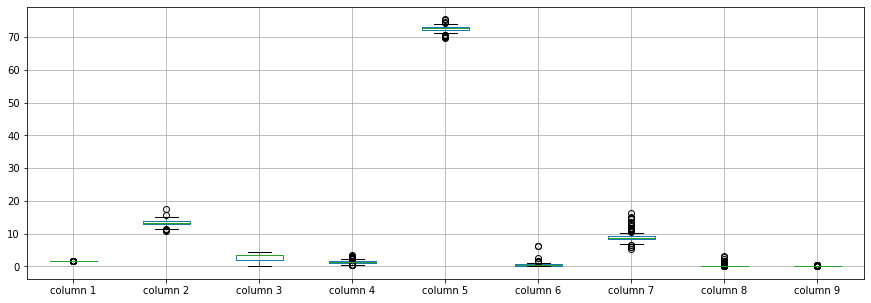

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518351
column 2    13.402911
column 3     2.682476
column 4     1.445377
column 5    72.650935
column 6     0.501043
column 7     8.947418
column 8     0.177536
column 9     0.054597
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.191328,-0.131447,-0.407713,-0.541010,-0.289469,0.814536,0.003425,0.111675
column 2,-0.191328,1.000000,-0.264812,0.156155,-0.067969,-0.257498,-0.281948,0.332227,-0.206725
column 3,-0.131447,-0.264812,1.000000,-0.476808,-0.161918,0.013646,-0.462184,-0.484564,0.109439
column 4,-0.407713,0.156155,-0.476808,1.000000,-0.007271,0.335314,-0.252206,0.478765,-0.081475
column 5,-0.541010,-0.067969,-0.161918,-0.007271,1.000000,-0.203478,-0.228396,-0.105336,-0.098895
column 6,-0.289469,-0.257498,0.013646,0.335314,-0.203478,1.000000,-0.312698,-0.041880,-0.014191
column 7,0.814536,-0.281948,-0.462184,-0.252206,-0.228396,-0.312698,1.000000,-0.109853,0.090577
column 8,0.003425,0.332227,-0.484564,0.478765,-0.105336,-0.041880,-0.109853,1.000000,-0.050195
column 9,0.111675,-0.206725,0.109439,-0.081475,-0.098895,-0.014191,0.090577,-0.050195,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+16,9+16+16,9+16+16+16,9+16+16+16+16,9+16+16+16+16+16,9+16+16+16+16+16+16,9+16+16+16+16+16,9+16+16+16+16,9+16+16+16,9+16+16,9+16,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 102.28510284423828
Epoch: 1 , loss: 102.28331815279446
Epoch: 2 , loss: 102.25376422588641
Epoch: 3 , loss: 102.26368185190054
Epoch: 4 , loss: 102.1709001981295
Epoch: 5 , loss: 102.22554016113281
Epoch: 6 , loss: 102.18096865140475
Epoch: 7 , loss: 102.15862098106972
Epoch: 8 , loss: 102.18470940223106
Epoch: 9 , loss: 102.16539294903095
Epoch: 10 , loss: 102.10385249211238
Epoch: 11 , loss: 102.13045560396634
Epoch: 12 , loss: 102.13369457538312
Epoch: 13 , loss: 102.1346928523137
Epoch: 14 , loss: 102.09769674447867
Epoch: 15 , loss: 102.13692004864032
Epoch: 16 , loss: 102.13397921048679
Epoch: 17 , loss: 102.12948138897235
Epoch: 18 , loss: 102.2066151545598
Epoch: 19 , loss: 102.09065598707933
Epoch: 20 , loss: 102.15868905874399
Epoch: 21 , loss: 102.14765167236328
Epoch: 22 , loss: 102.17760291466347
Epoch: 23 , loss: 102.16331012432391
Epoch: 24 , loss: 102.16368044339694
Epoch: 25 , loss: 102

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(19.39713001852353, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.01778841706072099

In [18]:
new_df.iloc[66,:]

column 1     1.52152
column 2    13.05000
column 3     3.65000
column 4     0.87000
column 5    72.22000
column 6     0.19000
column 7     9.85000
column 8     0.00000
column 9     0.17000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [21]:
imputations[-1].to_excel("Glass_NE_1(imp).xlsx", index=False, header=False)